# Assignment 2


#### 1. 复习上课内容以及复现课程代码

在本部分，你需要在复习上课内容和课程代码后，复现课程代码。 

#### 2. 回答以下理论题目

###       < 评阅点 >： 答案是否正确完整

###### 2.1 What conditions are required to make the BFS return the optimal solution ?
1、每一步的cost值非负  
2、每一步优先选择当前cost值最小的节点进行搜索

##### 2.2 Is there a way to make DFS find the optimal solution ? (You may need to read some material about iterative DFS)
没有办法保证找到最优解。

##### 2.3 In what conditions BFS is a better choice than DFS and vice versa ?
当求解目的是必须找到最优解时，要使用BFS。  
当求解目标是只要找到解即可，而且内存大小受限，则要使用DFS。

##### 2.4 When can we use machine learning ?
机器学习是从数据中发现规律。当我们的使用场景是有大量数据可用于训练，而且规律存在于数据中，则可使用机器学习。

##### 2.5 What is the gradient of a function ?
函数值变化最快的方向是梯度的方向，这个方向的导数就是梯度的大小。

##### 2.6 How can we find the maximum value of a function using the information of gradient ?
我们使用梯度下降法来求函数最小值。如果要求函数最大值，就给这个函数加个负号，就转化为求最小值了。

#### 3. 实践部分  寻找地铁路线

### < 评阅点 >  1: 爬虫爬取数据是否完整;  2:搜索算法是否正确

In this part, although we recommend you to use Beijing subway, you still can use the subway map of any cities that you are interested in. 

![title](img/ditu.png)

Please using the search policy to implement an agent. This agent receives two input, one is @param start station and the other is @param destination. Your agent should give the optimal route based on Beijing Subway system.

Deadline: 2019-October-27

#### Procedures

#### 1. Get data from web.  

Some tips: 

a. You might need this package: requests[https://2.python-requests.org/en/master/] to get webpages

b.You might need to use Regular Expression and Beautiful Soap package to parse the webpages

##### 2. Preprocessing data

Some tips:

a. Find a suitable way to save the data you get from the web. (Note: The way you use to save the data should be able to be used to create the graph that your agent is going to explore)

#### 3. Build the search agent

Build the search agent based ont he graph you built.

for example, if you use Beijing subway graoh, and you run:

\>>> search("奥体中心“，”天安门“）

You should get the result as follows: 奥体中心 -> A ->B ->C ... -> 天安门

### (Optional) Improve your agent to make it able to find a path based on different strategies

###  <评阅点> : 是否正确得到不同目标下的路径。

Some ideas you might want to try:

a. Find the shortest path between two stations.

b. Find the path that requires minimum transfers between two stations.

c. Combine the previous two ideas, find a more suitable path.

Compare your results with results obtained by using some apps such as Baidu map, A map, Google map or Apple map. If there is difference, try to explanate it.

In [1]:
# 获取URL数据（南京地铁数据，来自高德）：http://map.amap.com/service/subway?_1579109933079&srhdata=3201_drw_nanjing.json
import requests
import re
import numpy as np
r = requests.get('http://map.amap.com/service/subway?_1579109933079&srhdata=3201_drw_nanjing.json')
r.text

'{"s":"南京市地铁","o":"811,524","l":[{"f":[{"li":"320100022468","c":["970 1562","896 1561","821 1561","814 1560","810 1558","807 1555","805 1549","804 1542","804 1510","804 1435","804 1362","804 1287","804 1214","804 1136","804 1055","804 1054","805 1052","807 1051","810 1049","813 1048","823 1043","827 1040","831 1037","835 1034","859 1008"]},{"li":"320100022467","c":["854 1004","831 1029","827 1032","824 1035","820 1037","810 1042","806 1044","803 1046","800 1048","798 1051","797 1054","797 1136","797 1214","797 1287","797 1362","797 1435","797 1510","798 1542","799 1550","801 1558","805 1563","812 1566","821 1568","896 1568","970 1568"]}],"lo":"0","li":"320100022467|320100022468","ln":"S1号线(机场线)","ls":"320100022467","c":["856 1006","833 1031","829 1034","825 1037","821 1040","812 1045","808 1047","805 1048","803 1050","801 1052","801 1055","801 1136","801 1214","801 1287","801 1361","801 1362","801 1435","801 1510","801 1542","802 1550","804 1556","807 1560","813 1563","821 1565","895 1

In [23]:
def get_lines_stations_info(text):
    # 遍历text格式数据，组成地点数据结构
    # 所有线路信息的dict：key：线路名称；value：站点名称list
    lines_info = {}
    # 所有站点信息的dict：key：站点名称；value：站点坐标(x,y)
    stations_info = {}

    pattern = re.compile('"ln".*?"kn"')
    lines_list = pattern.findall(text)
    for i in range(len(lines_list)):
        # 地铁线路名
        pattern = re.compile('"ln":".*?"')
        line_name = pattern.findall(lines_list[i])[0][6:-1]
        # 站点信息list
        pattern = re.compile('{"sl":".*?}')
        temp_list = pattern.findall(lines_list[i])
        station_name_list = []
        for j in range(len(temp_list)):
            # 站名
            pattern = re.compile('"n":".*?"')
            station_name = pattern.findall(temp_list[j])[0][5:-1]
            station_name_list.append(station_name)
            # 坐标(x,y)
            pattern = re.compile('"sl":".*?"')
            position = tuple(map(float, pattern.findall(temp_list[j])[0][6:-1].split(',')))
            # 数据加入站点信息dict
            stations_info[station_name] = position

        # 数据加入地铁线路dict
        lines_info[line_name] = station_name_list
    return lines_info, stations_info

lines_info, stations_info = get_lines_stations_info(r.text)
stations_info

{'空港新城江宁': (118.887659, 31.737687),
 '禄口机场': (118.87364, 31.730279),
 '翔宇路南': (118.829201, 31.754866),
 '翔宇路北': (118.821542, 31.791284),
 '正方中路': (118.805809, 31.845115),
 '吉印大道': (118.795507, 31.886166),
 '河海大学·佛城西路': (118.791365, 31.914086),
 '翠屏山': (118.784514, 31.94253),
 '南京南站': (118.796786, 31.970968),
 '中国药科大学': (118.914127, 31.897684),
 '南京交院': (118.904804, 31.91286),
 '南医大·江苏经贸学院': (118.890239, 31.933475),
 '龙眠大道': (118.877156, 31.939902),
 '天印大道': (118.863561, 31.937638),
 '竹山路': (118.844454, 31.931965),
 '小龙湾': (118.832624, 31.929684),
 '百家湖': (118.820843, 31.931941),
 '胜太路': (118.821393, 31.943549),
 '河定桥': (118.820141, 31.952092),
 '双龙大道': (118.817196, 31.963833),
 '花神庙': (118.785648, 31.977795),
 '软件大道': (118.774583, 31.976727),
 '天隆寺': (118.763146, 31.979331),
 '安德门': (118.762136, 31.990862),
 '中华门': (118.774447, 32.006748),
 '三山街': (118.781583, 32.023021),
 '张府园': (118.783932, 32.030963),
 '新街口': (118.784136, 32.041806),
 '珠江路': (118.784208, 32.050974),
 '鼓楼': (118.7837

In [3]:
lines_info

{'S1号线(机场线)': ['空港新城江宁',
  '禄口机场',
  '翔宇路南',
  '翔宇路北',
  '正方中路',
  '吉印大道',
  '河海大学·佛城西路',
  '翠屏山',
  '南京南站'],
 '1号线': ['中国药科大学',
  '南京交院',
  '南医大·江苏经贸学院',
  '龙眠大道',
  '天印大道',
  '竹山路',
  '小龙湾',
  '百家湖',
  '胜太路',
  '河定桥',
  '双龙大道',
  '南京南站',
  '花神庙',
  '软件大道',
  '天隆寺',
  '安德门',
  '中华门',
  '三山街',
  '张府园',
  '新街口',
  '珠江路',
  '鼓楼',
  '玄武门',
  '新模范马路',
  '南京站',
  '红山动物园',
  '迈皋桥'],
 '2号线': ['油坊桥',
  '雨润大街',
  '元通',
  '奥体东',
  '兴隆大街',
  '集庆门大街',
  '云锦路',
  '莫愁湖',
  '汉中门',
  '上海路',
  '新街口',
  '大行宫',
  '西安门',
  '明故宫',
  '苜蓿园',
  '下马坊',
  '孝陵卫',
  '钟灵街',
  '马群',
  '金马路',
  '仙鹤门',
  '学则路',
  '仙林中心',
  '羊山公园',
  '南大仙林校区',
  '经天路'],
 'S3号线(宁和线)': ['高家冲',
  '林山',
  '桥林新城',
  '石碛河',
  '双垅',
  '兰花塘',
  '马骡圩',
  '刘村',
  '天保',
  '高庙路',
  '吴侯街',
  '平良大街',
  '永初路',
  '油坊桥',
  '贾西',
  '春江路',
  '铁心桥',
  '景明佳园',
  '南京南站'],
 '3号线': ['秣周东路',
  '东大九龙湖校区',
  '诚信大道',
  '九龙湖',
  '天元西路',
  '胜太西路',
  '宏运大道',
  '南京南站',
  '明发广场',
  '大明路',
  '卡子门',
  '雨花门',
  '武定门',
  '夫子庙',
  '常府街',
  '大行宫',
  '浮桥',
  '鸡鸣寺',
  '南京林业大

In [24]:
def get_neighbor_info(lines_info):
    # 把str2加入str1站点的邻接表中
    def add_neighbor_dict(info, str1, str2):
        list1 = info.get(str1)
        if not list1:
            list1 = []
        list1.append(str2)
        info[str1] = list1
        return info

    # 根据线路信息，建立站点邻接表dict
    neighbor_info = {}
    for line_name,station_list in lines_info.items():
        for i in range(len(station_list) - 1):
            sta1 = station_list[i]
            sta2 = station_list[i+1]
            neighbor_info = add_neighbor_dict(neighbor_info, sta1, sta2)
            neighbor_info = add_neighbor_dict(neighbor_info, sta2, sta1)
            
    return neighbor_info
        
neighbor_info = get_neighbor_info(lines_info)
neighbor_info

{'空港新城江宁': ['禄口机场', '柘塘'],
 '禄口机场': ['空港新城江宁', '翔宇路南'],
 '翔宇路南': ['禄口机场', '翔宇路北', '铜山'],
 '翔宇路北': ['翔宇路南', '正方中路'],
 '正方中路': ['翔宇路北', '吉印大道'],
 '吉印大道': ['正方中路', '河海大学·佛城西路'],
 '河海大学·佛城西路': ['吉印大道', '翠屏山'],
 '翠屏山': ['河海大学·佛城西路', '南京南站'],
 '南京南站': ['翠屏山', '双龙大道', '花神庙', '景明佳园', '宏运大道', '明发广场'],
 '中国药科大学': ['南京交院'],
 '南京交院': ['中国药科大学', '南医大·江苏经贸学院'],
 '南医大·江苏经贸学院': ['南京交院', '龙眠大道'],
 '龙眠大道': ['南医大·江苏经贸学院', '天印大道'],
 '天印大道': ['龙眠大道', '竹山路'],
 '竹山路': ['天印大道', '小龙湾'],
 '小龙湾': ['竹山路', '百家湖'],
 '百家湖': ['小龙湾', '胜太路'],
 '胜太路': ['百家湖', '河定桥'],
 '河定桥': ['胜太路', '双龙大道'],
 '双龙大道': ['河定桥', '南京南站'],
 '花神庙': ['南京南站', '软件大道'],
 '软件大道': ['花神庙', '天隆寺'],
 '天隆寺': ['软件大道', '安德门'],
 '安德门': ['天隆寺', '中华门', '小行'],
 '中华门': ['安德门', '三山街'],
 '三山街': ['中华门', '张府园'],
 '张府园': ['三山街', '新街口'],
 '新街口': ['张府园', '珠江路', '上海路', '大行宫'],
 '珠江路': ['新街口', '鼓楼'],
 '鼓楼': ['珠江路', '玄武门', '云南路', '鸡鸣寺'],
 '玄武门': ['鼓楼', '新模范马路'],
 '新模范马路': ['玄武门', '南京站'],
 '南京站': ['新模范马路', '红山动物园', '南京林业大学·新庄', '小市'],
 '红山动物园': ['南京站', '迈皋桥'],
 '迈皋桥': ['

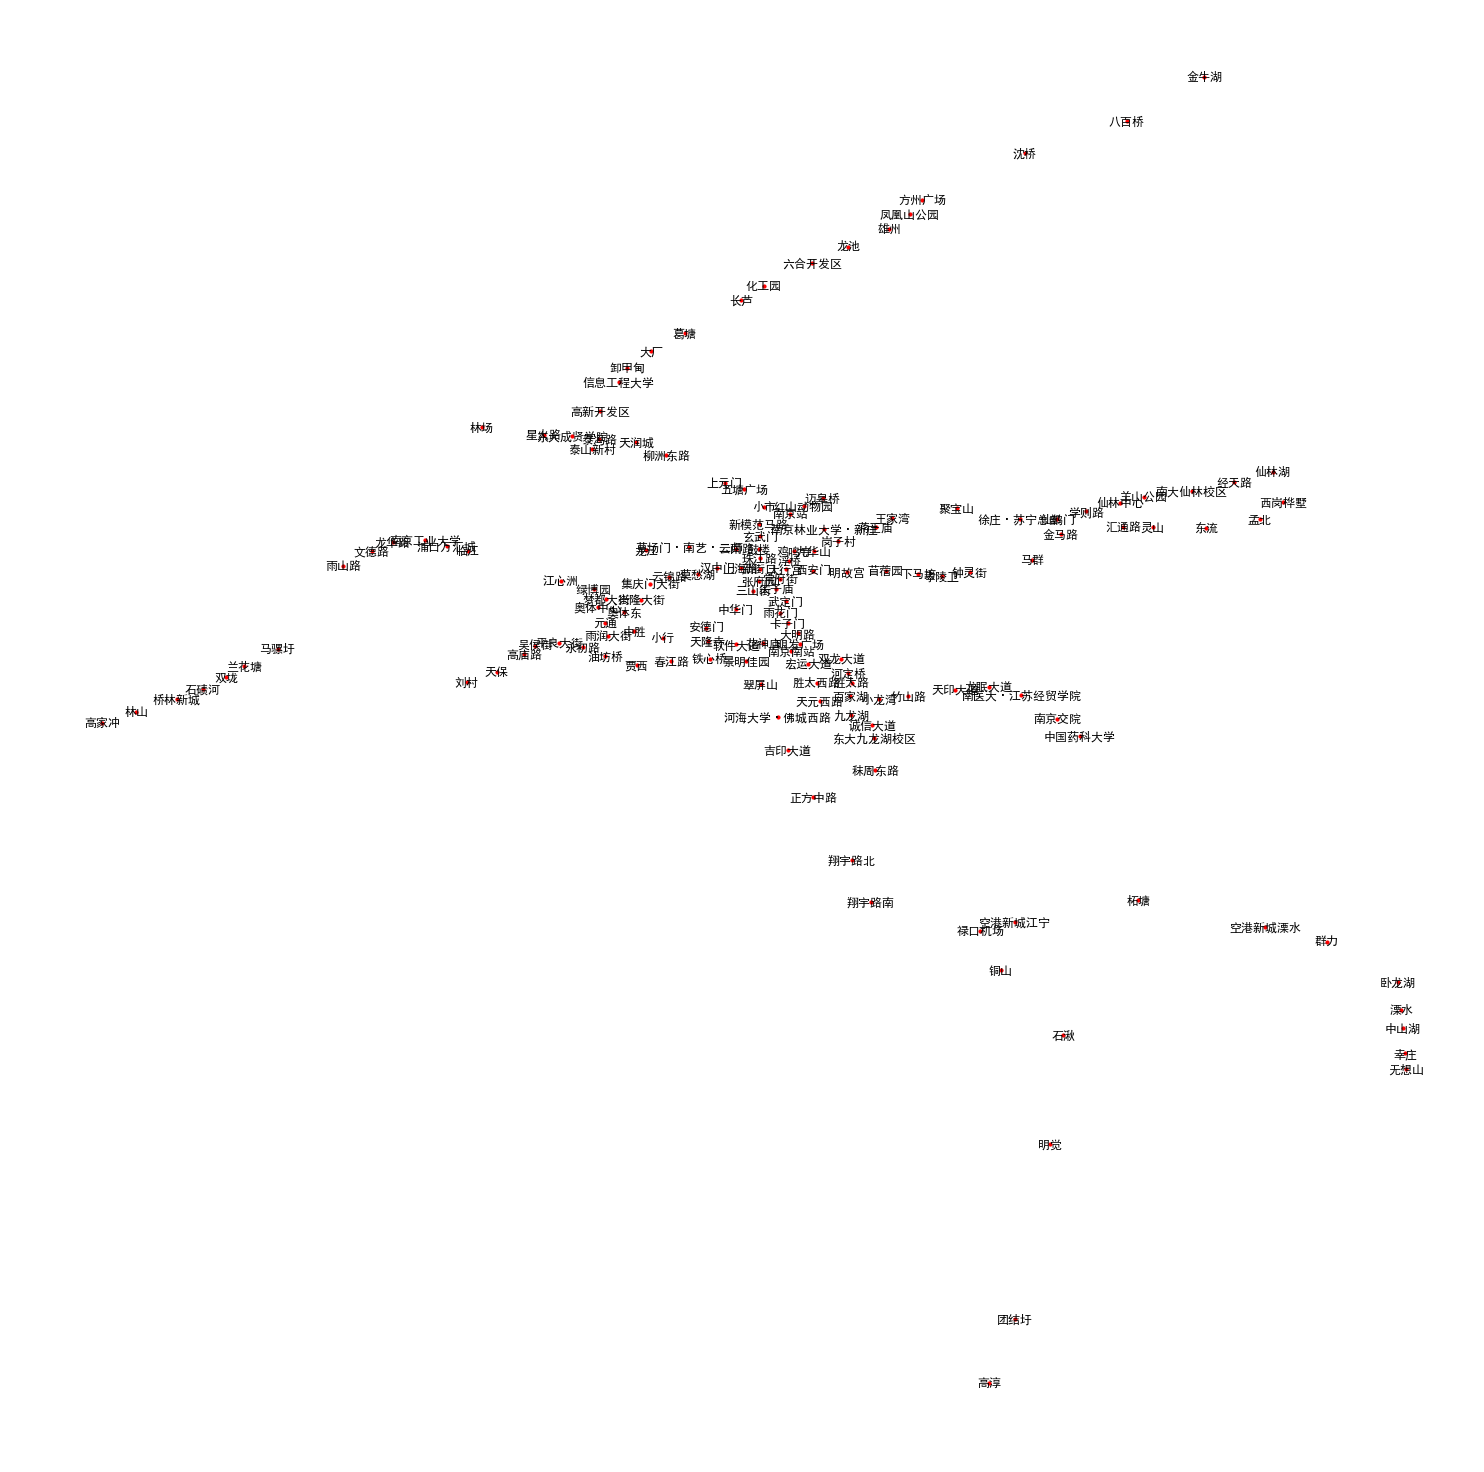

In [7]:
# 画地铁图
import networkx as nx
import matplotlib
import matplotlib.pyplot as plt
# 此代码解决不显示汉字的问题
matplotlib.rcParams['font.sans-serif'] = ['SimHei'] 
# matplotlib.rcParams['font.family']='sans-serif'
plt.figure(figsize=(20,20))
stations_graph = nx.Graph()
stations_graph.add_nodes_from(list(stations_info.keys()))
nx.draw(stations_graph, stations_info, with_labels=True, node_size=10)

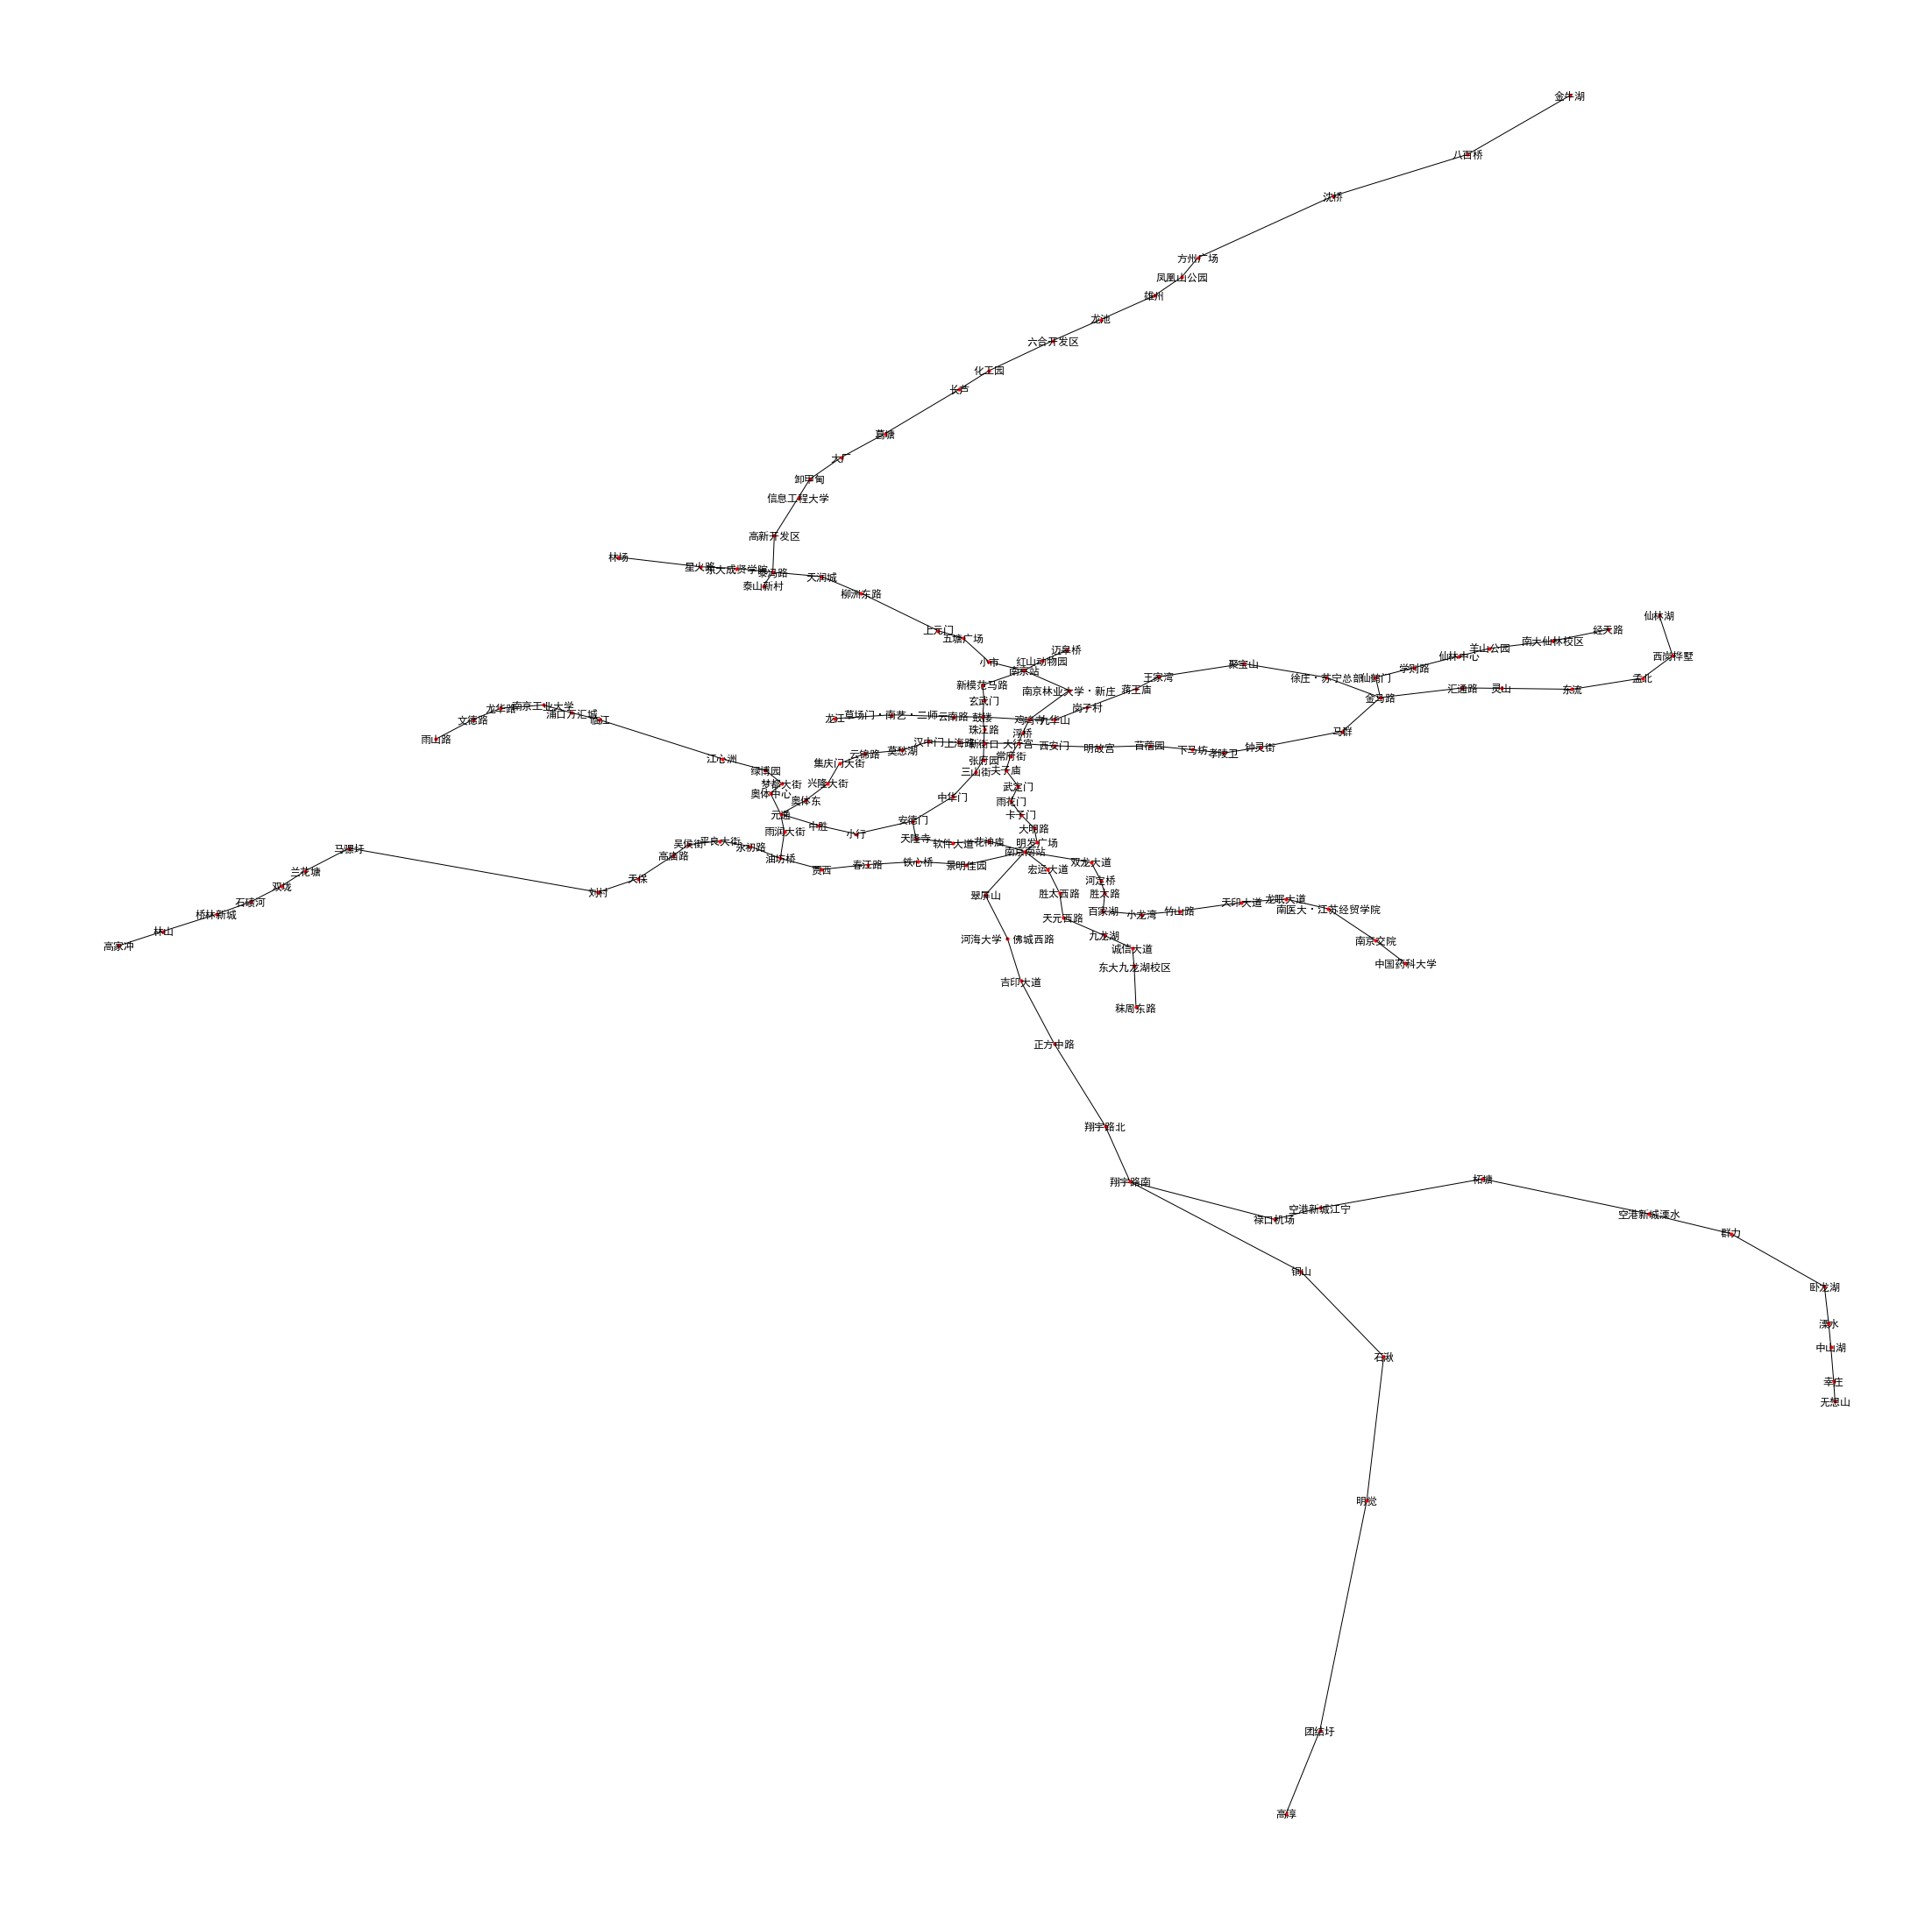

In [8]:
stations_connection_graph = nx.Graph(neighbor_info)
plt.figure(figsize=(30,30))
nx.draw(stations_connection_graph,stations_info,with_labels=True,node_size=10)

In [30]:
# 第一种算法：递归查找所有路径
def get_path_DFS_ALL(lines_info, neighbor_info, from_station, to_station):
    # 递归算法，本质上是深度优先
    # 遍历所有路径
    # 这种情况下，站点间的坐标距离难以转化为可靠的启发函数，所以只用简单的BFS算法
    
    # 检查输入站点名称
    if not neighbor_info.get(from_station):
        print('起始站点“%s”不存在。请正确输入！'%from_station)
        return None
    if not neighbor_info.get(to_station):
        print('目的站点“%s”不存在。请正确输入！'%to_station)
        return None
    path = []
    this_station = from_station
    path.append(this_station)
    neighbors = neighbor_info.get(this_station)
    node = {'pre_station':'',
            'this_station':this_station,
            'neighbors':neighbors,
            'path':path}
    
    return get_next_station_DFS_ALL(node, neighbor_info, to_station)

def get_next_station_DFS_ALL(node, neighbor_info, to_station):
    neighbors = node.get('neighbors')
    pre_station = node.get('this_station')
    path = node.get('path')
    paths = []
    for i in range(len(neighbors)):
        this_station = neighbors[i]
        if (this_station in path):
            # 如果此站点已经在路径中，说明环路，此路不通
            return None
        if neighbors[i] == to_station:
            # 找到终点，返回路径
            path.append(to_station)
            paths.append(path)
            return paths
        else:
            neighbors_ = neighbor_info.get(this_station).copy()
            neighbors_.remove(pre_station)
            path_ = path.copy()
            path_.append(this_station)
            new_node = {'pre_station':pre_station,
                        'this_station':this_station,
                        'neighbors':neighbors_,
                        'path':path_}
            paths_ =  get_next_station_DFS_ALL(new_node, neighbor_info, to_station)
            if paths_:
                paths.extend(paths_)

    return paths

paths = get_path_DFS_ALL(lines_info, neighbor_info, '天保', '林场')
print('共有%d种路径。'%len(paths))
for item in paths:
    print("此路径总计%d站:"%(len(item)-1))
    print('-'.join(item))

共有36种路径。
此路径总计29站:
天保-高庙路-吴侯街-平良大街-永初路-油坊桥-雨润大街-元通-奥体东-兴隆大街-集庆门大街-云锦路-莫愁湖-汉中门-上海路-新街口-珠江路-鼓楼-玄武门-新模范马路-南京站-小市-五塘广场-上元门-柳洲东路-天润城-泰冯路-东大成贤学院-星火路-林场
此路径总计29站:
天保-高庙路-吴侯街-平良大街-永初路-油坊桥-雨润大街-元通-奥体东-兴隆大街-集庆门大街-云锦路-莫愁湖-汉中门-上海路-新街口-珠江路-鼓楼-鸡鸣寺-南京林业大学·新庄-南京站-小市-五塘广场-上元门-柳洲东路-天润城-泰冯路-东大成贤学院-星火路-林场
此路径总计42站:
天保-高庙路-吴侯街-平良大街-永初路-油坊桥-雨润大街-元通-奥体东-兴隆大街-集庆门大街-云锦路-莫愁湖-汉中门-上海路-新街口-大行宫-西安门-明故宫-苜蓿园-下马坊-孝陵卫-钟灵街-马群-金马路-徐庄·苏宁总部-聚宝山-王家湾-蒋王庙-岗子村-九华山-鸡鸣寺-南京林业大学·新庄-南京站-小市-五塘广场-上元门-柳洲东路-天润城-泰冯路-东大成贤学院-星火路-林场
此路径总计44站:
天保-高庙路-吴侯街-平良大街-永初路-油坊桥-雨润大街-元通-奥体东-兴隆大街-集庆门大街-云锦路-莫愁湖-汉中门-上海路-新街口-大行宫-西安门-明故宫-苜蓿园-下马坊-孝陵卫-钟灵街-马群-金马路-徐庄·苏宁总部-聚宝山-王家湾-蒋王庙-岗子村-九华山-鸡鸣寺-鼓楼-玄武门-新模范马路-南京站-小市-五塘广场-上元门-柳洲东路-天润城-泰冯路-东大成贤学院-星火路-林场
此路径总计29站:
天保-高庙路-吴侯街-平良大街-永初路-油坊桥-雨润大街-元通-奥体东-兴隆大街-集庆门大街-云锦路-莫愁湖-汉中门-上海路-新街口-大行宫-浮桥-鸡鸣寺-南京林业大学·新庄-南京站-小市-五塘广场-上元门-柳洲东路-天润城-泰冯路-东大成贤学院-星火路-林场
此路径总计31站:
天保-高庙路-吴侯街-平良大街-永初路-油坊桥-雨润大街-元通-奥体东-兴隆大街-集庆门大街-云锦路-莫愁湖-汉中门-上海路-新街口-大行宫-浮桥-鸡鸣寺-鼓楼-玄武门-新模范马路-南京站-小市-五塘广场-上元门-柳洲东路-天润城-泰冯路-东大成贤学院-星火路-林场
此路径总计37站:
天保-高庙路-吴侯街-平良大街-永初路-油

In [20]:
# 第二种算法：没有启发函数的简单宽度优先
def get_path_BFS(lines_info, neighbor_info, from_station, to_station):
    # 搜索策略：以站点数量为cost（因为车票价格是按站算的）
    # 这种情况下，站点间的坐标距离难以转化为可靠的启发函数，所以只用简单的BFS算法
    # 由于每深一层就是cost加1，所以每层的cost都相同，算和不算没区别，所以省略
    
    # 检查输入站点名称
    if not neighbor_info.get(from_station):
        print('起始站点“%s”不存在。请正确输入！'%from_station)
        return None
    if not neighbor_info.get(to_station):
        print('目的站点“%s”不存在。请正确输入！'%to_station)
        return None
    
    # 搜索节点是个dict，key=站名，value是包含路过的站点list
    nodes = {}
    nodes[from_station] = [from_station]
    
    while True:
        new_nodes = {}
        for (k,v) in nodes.items():
            neighbor = neighbor_info.get(k).copy()
            if (len(v) >= 2):
                # 不往上一站走
                pre_station = v[-2]
                neighbor.remove(pre_station)
            for station in neighbor:
                # 遍历邻居
                if station in nodes:
                    # 跳过已搜索过的节点
                    continue
                path = v.copy()
                path.append(station)
                new_nodes[station] = path
                if station == to_station:
                    # 找到路径，结束
                    return path
        nodes = new_nodes
        
    print('未能找到路径')
    return None

paths = get_path_BFS(lines_info, neighbor_info, '天保', '林场')
print("路径总计%d站。"%(len(paths)-1))
print("-".join(paths))
# 高德导航是31站，只有1次换乘
# 代码结果是28站，但是有5次换乘
# 猜测高德的路径cost主要是时间

路径总计28站。
天保-高庙路-吴侯街-平良大街-永初路-油坊桥-雨润大街-元通-中胜-小行-安德门-中华门-三山街-张府园-新街口-大行宫-浮桥-鸡鸣寺-南京林业大学·新庄-南京站-小市-五塘广场-上元门-柳洲东路-天润城-泰冯路-东大成贤学院-星火路-林场


In [118]:
# 第三种算法：以路径路程为cost的启发式搜索
import pandas as pd
def get_path_Astar(lines_info, neighbor_info, stations_info, from_station, to_station):
    # 搜索策略：以路径的站点间直线距离累加为cost，以当前站点到目标的直线距离为启发函数
    
    
    # 检查输入站点名称
    if not neighbor_info.get(from_station):
        print('起始站点“%s”不存在。请正确输入！'%from_station)
        return None
    if not neighbor_info.get(to_station):
        print('目的站点“%s”不存在。请正确输入！'%to_station)
        return None
    
    # 计算所有节点到目标节点的直线距离，备用
    distances = {}
    x,y = stations_info.get(to_station)
    for (k,v) in stations_info.items():
        x0,y0 = stations_info.get(k)
        l = ((x-x0)**2 + (y-y0)**2)**0.5
        distances[k] = l
        
    # 已搜索过的节点，dict
    # key=站点名称，value是已知的起点到此站点的最小cost
    searched = {}
    searched[from_station] = 0
    
    # 数据结构为pandas的dataframe
    # index为站点名称
    # g为已走路径，h为启发函数值（当前到目标的直线距离）
    nodes = pd.DataFrame([[[from_station], 0, 0, distances.get(from_station)]],
                         index=[from_station], columns=['path', 'cost', 'g', 'h']) 
    
    count = 0
    while True:
        if count > 1000:
            break
        nodes.sort_values('cost', inplace=True)
        for index, node in nodes.iterrows():
            count += 1
            # 向邻居中离目的地最短的那个站点搜索
            neighbors = neighbor_info.get(index).copy()
            if len(node['path']) >= 2:
                # 不向这个路径的反向去搜索
                neighbors.remove(node['path'][-2])
            for i in range(len(neighbors)):
                count += 1
                neighbor = neighbors[i]
                g = node['g'] + get_distance(stations_info, index, neighbor)
                h = distances[neighbor]
                cost = g + h
                path = node['path'].copy()
                path.append(neighbor)
                if neighbor == to_station:
                    # 找到目标，结束
                    print('共检索%d次。'%count)
                    return path
                if neighbor in searched:
                    if g >= searched[neighbor]:
                        # 说明现在搜索的路径不是最优，忽略
                        continue
                    else:
                        searched[neighbor] = g
                        # 修改此站点对应的node信息
#                         nodes.loc[neighbor, 'path'] = path # 这行总是报错
#                         nodes.loc[neighbor, 'cost'] = cost
#                         nodes.loc[neighbor, 'g'] = g
#                         nodes.loc[neighbor, 'h'] = h
                        # 不知道怎么修改df中的list元素，只能删除再新增行
                        nodes.drop(neighbor, axis=0, inplace=True)
                        row = pd.DataFrame([[path, cost, g, h]],
                                       index=[neighbor], columns=['path', 'cost', 'g', 'h'])
                        nodes = nodes.append(row)
                        
                else:
                    searched[neighbor] = g
                    row = pd.DataFrame([[path, cost, g, h]],
                                       index=[neighbor], columns=['path', 'cost', 'g', 'h'])
                    nodes = nodes.append(row)
            # 这个站点的所有邻居都搜索完了，删除这个节点
            nodes.drop(index, axis=0, inplace=True)

        # 外层for循环只跑第一行数据，然后重新sort后再计算
        continue         
        
    print('未能找到路径')
    return None

def get_distance(stations_info, str1, str2):
    x1,y1 = stations_info.get(str1)
    x2,y2 = stations_info.get(str2)
    return ((x1-x2)**2 + (y1-y2)**2)** 0.5

paths = get_path_Astar(lines_info, neighbor_info, stations_info, '天保', '林场')
if paths:
    print("路径总计%d站。"%(len(paths)-1))
    print("-".join(paths))
# 高德导航是31站，只有1次换乘
# 代码结果是28站，与以地铁站数为cost的结果相同，但是路径不同（从第一种遍历的算法能看到，28站到达目的地的路径有3种）
# 猜测高德的路径cost主要是时间

共检索291次。
路径总计28站。
天保-高庙路-吴侯街-平良大街-永初路-油坊桥-雨润大街-元通-中胜-小行-安德门-中华门-三山街-张府园-新街口-珠江路-鼓楼-玄武门-新模范马路-南京站-小市-五塘广场-上元门-柳洲东路-天润城-泰冯路-东大成贤学院-星火路-林场


## Congratulations ! You have finished the assignment of week 2.

![title](img/agent.png)

### If you have any suggestions regarding the teaching, please feel free to send them to my eamil (eric.lee.xiao@gmail.com) 